In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
from dask import distributed as dds
from dask import delayed
import time

# Connecting to existing cluster

In [4]:
#cluster = dds.LocalCluster()
#client = dds.Client(cluster)
client = dds.Client('tcp://127.0.0.1:51001')
client

Client Scheduler: tcp://127.0.0.1:51001 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 4 Memory: 8.49 GB


# Problem: Tree reduction

Semi-easily parallelisable

In [16]:
def slowadd(x, y, delay=0.1):
    time.sleep(delay)
    return x + y

def slowmult(x, y, delay=0.1):
    time.sleep(delay)
    return x * y

## Sequential version

In [11]:
PROBLEM_SIZE = 256

In [17]:
%%time
L = range(PROBLEM_SIZE)

while len(L) > 1:  # while there is more than one element left
    # add neighbors together
    R = [slowadd(a, b) for a, b in zip(L[::2], L[1::2])]
    L = [slowmult(a, b) for a, b in zip(R[::2], R[1::2])]

print('res =', L[0])

res = 11898044691517296124845032248830203766784000
Wall time: 27.9 s


## Dask version

In [22]:
PROBLEM_SIZE = 256

In [23]:
L = range(PROBLEM_SIZE)

while len(L) > 1:  # while there is more than one element left
    # add neighbors together
    R = [delayed(slowadd)(a, b) for a, b in zip(L[::2], L[1::2])]
    L = [delayed(slowmult)(a, b) for a, b in zip(R[::2], R[1::2])]

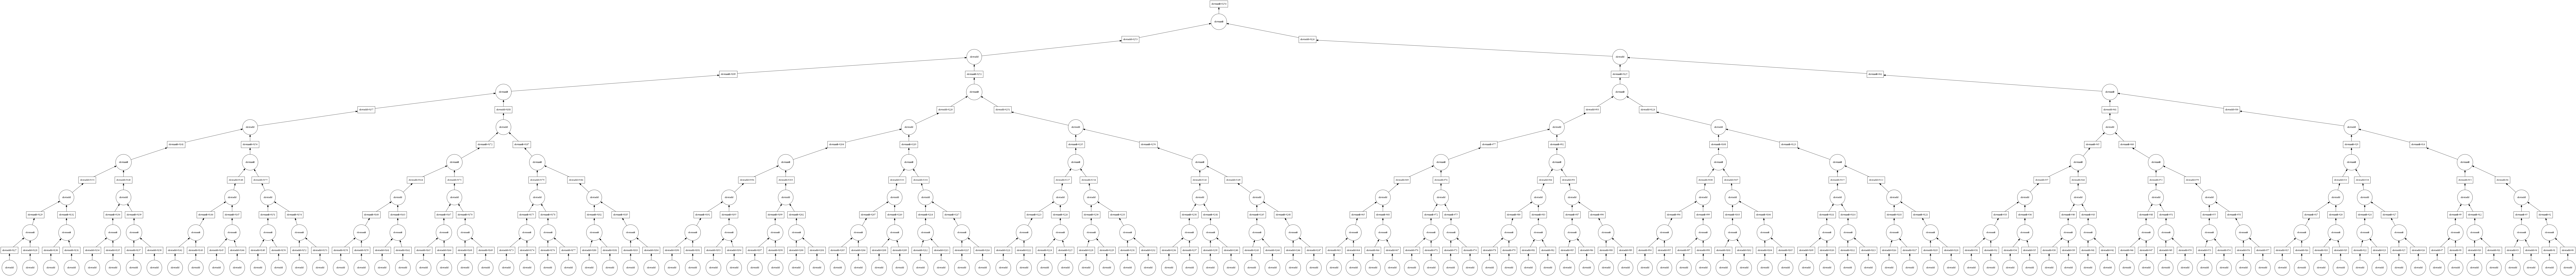

In [24]:
L[0].visualize()

In [25]:
%%time
res = L[0].compute()
print('res =', res)

res = 11898044691517296124845032248830203766784000
Wall time: 7.68 s


# Sequential Task - not worth it

In [27]:
def inc(x):
    return x + 1

In [28]:
%%time
x = 1
for i in range(100):
    x = inc(x)
x

Wall time: 0 ns


In [29]:
%%time
x = 1
for i in range(100):
    x = delayed(inc)(x)
x.compute()

Wall time: 1.61 s


distributed.client - WARNING - Client report stream closed to scheduler
tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3C02E18>, <tornado.concurrent.Future object at 0x0000021BB3CB93C8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\tcp.py", line 174, in read
    n_frames = yield stream.read_bytes(8)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\iostream.py", line 324, in read_bytes
    self._try_inline_read()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\iostream.py", line 709, in _try_inline_read
    self._check_closed()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\iostream.py", line 925, in _check_closed
    raise StreamClosedError(real_error=self.error)
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent c

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DDCAE8>, <tornado.concurrent.Future object at 0x0000021BB3DD0EF0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E4ABF8>, <tornado.concurrent.Future object at 0x0000021BB3E3BF98>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E4AEA0>, <tornado.concurrent.Future object at 0x0000021BB3E8F550>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DD32F0>, <tornado.concurrent.Future object at 0x0000021BB3E1B978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E51268>, <tornado.concurrent.Future object at 0x0000021BB3DEFA90>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EADF28>, <tornado.concurrent.Future object at 0x0000021BB3E53AC8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E779D8>, <tornado.concurrent.Future object at 0x0000021BB3E2B7B8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EE0EA0>, <tornado.concurrent.Future object at 0x0000021BB3EDEB70>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E72950>, <tornado.concurrent.Future object at 0x0000021BB3F00588>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EADF28>, <tornado.concurrent.Future object at 0x0000021BB3DF53C8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F346A8>, <tornado.concurrent.Future object at 0x0000021BB3F29978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EA06A8>, <tornado.concurrent.Future object at 0x0000021BB3E53CF8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F03A60>, <tornado.concurrent.Future object at 0x0000021BB3E1B630>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F27268>, <tornado.concurrent.Future object at 0x0000021BB3F4FB00>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E5A840>, <tornado.concurrent.Future object at 0x0000021BB3E1BB70>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E93048>, <tornado.concurrent.Future object at 0x0000021BB3C7CDA0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E820D0>, <tornado.concurrent.Future object at 0x0000021BB3F9D4E0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F0EBF8>, <tornado.concurrent.Future object at 0x0000021BB3CB9978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F52D08>, <tornado.concurrent.Future object at 0x0000021BB3F4B278>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E28730>, <tornado.concurrent.Future object at 0x0000021BB3C7C6A0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F596A8>, <tornado.concurrent.Future object at 0x0000021BB3F88400>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E94510>, <tornado.concurrent.Future object at 0x0000021BB3E84FD0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EEC730>, <tornado.concurrent.Future object at 0x0000021BB3F88EB8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E5EA60>, <tornado.concurrent.Future object at 0x0000021BB3F4BC50>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F522F0>, <tornado.concurrent.Future object at 0x0000021BB3E71F28>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3C7A400>, <tornado.concurrent.Future object at 0x0000021BB3CB94E0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E5C400>, <tornado.concurrent.Future object at 0x0000021BB3E49CF8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E65BF8>, <tornado.concurrent.Future object at 0x0000021BB3E4CF60>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E5EC80>, <tornado.concurrent.Future object at 0x0000021BB3DE45C0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EC8C80>, <tornado.concurrent.Future object at 0x0000021BB3EBB780>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E82EA0>, <tornado.concurrent.Future object at 0x0000021BB3F9D7F0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E3B048>, <tornado.concurrent.Future object at 0x0000021BB3E49898>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EC8510>, <tornado.concurrent.Future object at 0x0000021BB3FD4AC8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E86268>, <tornado.concurrent.Future object at 0x0000021BB3F7D320>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E94D08>, <tornado.concurrent.Future object at 0x0000021BB3F9D898>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DE0A60>, <tornado.concurrent.Future object at 0x0000021BB3E15358>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3D03730>, <tornado.concurrent.Future object at 0x0000021BB3C5FCF8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FE7A60>, <tornado.concurrent.Future object at 0x0000021BB3FF8EB8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E3B0D0>, <tornado.concurrent.Future object at 0x0000021BB3FC6048>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E5E0D0>, <tornado.concurrent.Future object at 0x0000021BB3C4FFD0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4053378>, <tornado.concurrent.Future object at 0x0000021BB4047940>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FFBD08>, <tornado.concurrent.Future object at 0x0000021BB3D05908>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB2268>, <tornado.concurrent.Future object at 0x0000021BB3E24B38>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB409C2F0>, <tornado.concurrent.Future object at 0x0000021BB408DB00>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FFB378>, <tornado.concurrent.Future object at 0x0000021BB3C5FCF8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4088378>, <tornado.concurrent.Future object at 0x0000021BB3F884E0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB2D08>, <tornado.concurrent.Future object at 0x0000021BB4099EB8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E828C8>, <tornado.concurrent.Future object at 0x0000021BB3F34898>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3C6FA60>, <tornado.concurrent.Future object at 0x0000021BB3F435C0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB2EA0>, <tornado.concurrent.Future object at 0x0000021BB3F4BF28>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40931E0>, <tornado.concurrent.Future object at 0x0000021BB40B49E8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FBBB70>, <tornado.concurrent.Future object at 0x0000021BB3FD4C88>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E82D08>, <tornado.concurrent.Future object at 0x0000021BB3EC90F0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40A7620>, <tornado.concurrent.Future object at 0x0000021BB3F43588>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EECD90>, <tornado.concurrent.Future object at 0x0000021BB3DFC978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E65730>, <tornado.concurrent.Future object at 0x0000021BB3F29400>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E17AE8>, <tornado.concurrent.Future object at 0x0000021BB3E049B0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB29D8>, <tornado.concurrent.Future object at 0x0000021BB4054160>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EEC268>, <tornado.concurrent.Future object at 0x0000021BB3ECA940>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E966A8>, <tornado.concurrent.Future object at 0x0000021BB3E624E0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FAD2F0>, <tornado.concurrent.Future object at 0x0000021BB3F4BF28>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40BFD90>, <tornado.concurrent.Future object at 0x0000021BB40C2198>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E28048>, <tornado.concurrent.Future object at 0x0000021BB3EC7A20>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DF4840>, <tornado.concurrent.Future object at 0x0000021BB40A1400>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EDEC80>, <tornado.concurrent.Future object at 0x0000021BB3FF1AC8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DFD400>, <tornado.concurrent.Future object at 0x0000021BB4073E10>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E28EA0>, <tornado.concurrent.Future object at 0x0000021BB3E158D0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F5E378>, <tornado.concurrent.Future object at 0x0000021BB3F55B70>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EECEA0>, <tornado.concurrent.Future object at 0x0000021BB40DF668>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB401A2F0>, <tornado.concurrent.Future object at 0x0000021BB3FAB198>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E23D08>, <tornado.concurrent.Future object at 0x0000021BB3FEC780>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EC8840>, <tornado.concurrent.Future object at 0x0000021BB3C2DDA0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E65378>, <tornado.concurrent.Future object at 0x0000021BB40A6940>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F778C8>, <tornado.concurrent.Future object at 0x0000021BB3FDA5C0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4088840>, <tornado.concurrent.Future object at 0x0000021BB3E53908>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F64378>, <tornado.concurrent.Future object at 0x0000021BB3F78160>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FD8620>, <tornado.concurrent.Future object at 0x0000021BB3F42E80>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F5E268>, <tornado.concurrent.Future object at 0x0000021BB3E152B0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EF1BF8>, <tornado.concurrent.Future object at 0x0000021BB3F0F978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E94048>, <tornado.concurrent.Future object at 0x0000021BB3E5AF98>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F77A60>, <tornado.concurrent.Future object at 0x0000021BB4099A90>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EEC488>, <tornado.concurrent.Future object at 0x0000021BB3F51C50>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EDE1E0>, <tornado.concurrent.Future object at 0x0000021BB3E04DA0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EC6D90>, <tornado.concurrent.Future object at 0x0000021BB3ED80F0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E4A400>, <tornado.concurrent.Future object at 0x0000021BB3C4FA58>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F64A60>, <tornado.concurrent.Future object at 0x0000021BB3E04DD8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E59C80>, <tornado.concurrent.Future object at 0x0000021BB3E462B0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EDE620>, <tornado.concurrent.Future object at 0x0000021BB3C7C0F0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EC6400>, <tornado.concurrent.Future object at 0x0000021BB40A68D0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E28B70>, <tornado.concurrent.Future object at 0x0000021BB3E3A2B0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F64730>, <tornado.concurrent.Future object at 0x0000021BB40E3588>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DFC620>, <tornado.concurrent.Future object at 0x0000021BB3EC2780>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F64B70>, <tornado.concurrent.Future object at 0x0000021BB3FDA630>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3C14F28>, <tornado.concurrent.Future object at 0x0000021BB3EC7710>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4060C80>, <tornado.concurrent.Future object at 0x0000021BB407B208>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E39620>, <tornado.concurrent.Future object at 0x0000021BB3EBF7F0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB2378>, <tornado.concurrent.Future object at 0x0000021BB3EE14E0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FF4EA0>, <tornado.concurrent.Future object at 0x0000021BB3FF9E80>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EC01E0>, <tornado.concurrent.Future object at 0x0000021BB3C7C630>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F75D90>, <tornado.concurrent.Future object at 0x0000021BB4073AC8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40600D0>, <tornado.concurrent.Future object at 0x0000021BB3FFA860>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E949D8>, <tornado.concurrent.Future object at 0x0000021BB3ED3F28>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F406A8>, <tornado.concurrent.Future object at 0x0000021BB3F25B70>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3D03400>, <tornado.concurrent.Future object at 0x0000021BB410ECC0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4060D08>, <tornado.concurrent.Future object at 0x0000021BB3EC7B00>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E98B70>, <tornado.concurrent.Future object at 0x0000021BB3E61278>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E4A048>, <tornado.concurrent.Future object at 0x0000021BB3EBF278>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F9C950>, <tornado.concurrent.Future object at 0x0000021BB40CD978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F9C7B8>, <tornado.concurrent.Future object at 0x0000021BB3E8F3C8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E6F6A8>, <tornado.concurrent.Future object at 0x0000021BB3DE0DD8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FB8268>, <tornado.concurrent.Future object at 0x0000021BB40025C0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E6FBF8>, <tornado.concurrent.Future object at 0x0000021BB3FDA400>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F9C6A8>, <tornado.concurrent.Future object at 0x0000021BB3F4E978>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E85510>, <tornado.concurrent.Future object at 0x0000021BB3FED710>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3C7A2F0>, <tornado.concurrent.Future object at 0x0000021BB3FA2908>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FB80D0>, <tornado.concurrent.Future object at 0x0000021BB3FF9550>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E6F378>, <tornado.concurrent.Future object at 0x0000021BB3FE0C88>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FB1BF8>, <tornado.concurrent.Future object at 0x0000021BB3FDAE48>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB401A268>, <tornado.concurrent.Future object at 0x0000021BB3F29278>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E856A8>, <tornado.concurrent.Future object at 0x0000021BB40C1780>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4018598>, <tornado.concurrent.Future object at 0x0000021BB3DFF128>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40D8D08>, <tornado.concurrent.Future object at 0x0000021BB40176D8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40C8730>, <tornado.concurrent.Future object at 0x0000021BB3C5F518>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB2620>, <tornado.concurrent.Future object at 0x0000021BB40C4278>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F89488>, <tornado.concurrent.Future object at 0x0000021BB3F7AE10>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DEFEA0>, <tornado.concurrent.Future object at 0x0000021BB3FA2048>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3EB2EA0>, <tornado.concurrent.Future object at 0x0000021BB3F25240>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40C80D0>, <tornado.concurrent.Future object at 0x0000021BB3F8C748>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FB1F28>, <tornado.concurrent.Future object at 0x0000021BB41090F0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E37840>, <tornado.concurrent.Future object at 0x0000021BB3F59748>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F40620>, <tornado.concurrent.Future object at 0x0000021BB3F52320>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4018F28>, <tornado.concurrent.Future object at 0x0000021BB3FF99B0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F12840>, <tornado.concurrent.Future object at 0x0000021BB3EEE198>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3E79C80>, <tornado.concurrent.Future object at 0x0000021BB3DE0D30>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F3D9D8>, <tornado.concurrent.Future object at 0x0000021BB3FD20B8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FA1620>, <tornado.concurrent.Future object at 0x0000021BB407BDD8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F40598>, <tornado.concurrent.Future object at 0x0000021BB3F331D0>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4005840>, <tornado.concurrent.Future object at 0x0000021BB3C5FBA8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3DEA0D0>, <tornado.concurrent.Future object at 0x0000021BB3EEE400>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40B5158>, <tornado.concurrent.Future object at 0x0000021BB3DFFAC8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40EB2F0>, <tornado.concurrent.Future object at 0x0000021BB3F1ECF8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40D8E18>, <tornado.concurrent.Future object at 0x0000021BB407BD30>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F12158>, <tornado.concurrent.Future object at 0x0000021BB3FD2908>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3F12AE8>, <tornado.concurrent.Future object at 0x0000021BB3EB6CF8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB40D8D90>, <tornado.concurrent.Future object at 0x0000021BB40C1320>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4103D90>, <tornado.concurrent.Future object at 0x0000021BB4017C18>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB3FA09D8>, <tornado.concurrent.Future object at 0x0000021BB3CB9A20>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021BB4080B70>, <tornado.concurrent.Future object at 0x0000021BB40CB0B8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex